In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv

Pengumpulan data

In [2]:
def scrape_detik(hal):
    global hades
    a = 1
    hades = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    for page in range(1, hal + 1):
        url = f'https://www.detik.com/search/searchall?query=kualitas+udara&sortby=time&page={page}'
        ge = req.get(url, headers=hades).text
        sop = bs(ge, 'html.parser')  

        # Mencari semua elemen dengan class 'media__text'
        media_texts = sop.find_all('div', class_='media__text')

        for media_text in media_texts:
            # Mencari elemen h3 dengan class 'media__title' di dalam 'media_text'
            title_element = media_text.find('h3', class_='media__title')

            # Mencari elemen div dengan class 'media__date' untuk tanggal
            date_element = media_text.find('div', class_='media__date')

            # Mencari elemen div dengan class 'media__desc' untuk konten artikel
            content_element = media_text.find('div', class_='media__desc')

            # Jika elemen ditemukan, ambil teks di dalamnya
            if title_element and date_element and content_element:
                title = title_element.text.strip()
                date = date_element.text.strip()
                content = content_element.text.strip()

                # Cetak judul artikel, tanggal, dan konten
                print(f"Judul Artikel[{a}]:", title)
                print("Tanggal:", date)
                print("Konten:", content)
                print()
                a += 1
            else:
                print("Tidak dapat menemukan judul artikel, tanggal, atau konten.")

# Menjalankan fungsi scraping untuk 10 halaman
scrape_detik(10)

Judul Artikel[1]: KKHI Makkah Gelar Inspeksi untuk Jamin Kualitas Makanan Jemaah Haji
Tanggal: 5 jam yang lalu
Konten: Layanan katering menjadi hal penting yang tak luput dari sorotan. KKHI Makkah menggelar inspeksi untuk memastikan makanan tersaji dengan baik.

Judul Artikel[2]: Heru Budi Instruksikan DLH DKI Bersinergi Atasi Polusi Udara
Tanggal: 3 jam yang lalu
Konten: Guna mengendalikan polusi udara yang diakibatkan oleh emisi kendaraan bermotor, Pemprov DKI Jakarta melakukan sejumlah strategi pengendalian transportasi.

Judul Artikel[3]: Mendag Lepas 10 Kontainer Ekspor Kopi Sumut ke AS, Minta Kualitas Ditingkatkan
Tanggal: 4 jam yang lalu
Konten: Mendag Zulhas melepas 10 kontainer ekspor kopi di Sumatera Utara (Sumut). Eskpor kopi milik PT Ujung Jaya Internasional ini akan dikirim ke Amerika Serikat.

Tidak dapat menemukan judul artikel, tanggal, atau konten.
Judul Artikel[4]: Jelang Jakarta Marathon 2024, DLH DKI Nyatakan Kualitas Udara Moderat
Tanggal: Sabtu, 22 Jun 2024 03:33 

In [3]:
from textblob import TextBlob
import numpy as np

# Daftar judul artikel
judul_artikel = [
    "Kualitas udara di Jakarta tetap tak sehat meski jalan raya kosong kendaraan.",
    "Kualitas udara Jakarta dinyatakan tak sehat pagi ini versi IQ Air. Polusi udara Jakarta menempati posisi teratas bersama dengan Kinshasa pada pukul 10.08 WIB.",
    "BMKG mengungkap penyebab kualitas udara di Jakarta buruk kemarin.",
    "Kualitas udara DKI Jakarta dan Tangerang Selatan bukan lagi merah  tetapi berada di zona 'ungu' alias sangat tidak sehat pagi ini. Ada apa? Ini datanya.",
    "Selain karena polusi, kualitas udara yang buruk juga disebabkan oleh pemanasan global. Bagaimana pengembang merespons kondisi tersebut?",
    "Banyak orang yang belum tahu bahwa kualitas udara yang buruk bisa mempengaruhi tidak hanya kesehatan.",
    "Anies Baswedan mengingatkan pentingnya kolaborasi antarwilayah untuk mengatasi masalah polusi udara di Jakarta.",
    "Polutan utama udara di Jakarta ialah PM 2,5. Berdasarkan situs BMKG, PM 2,5 adalah partikel udara yang berukuran lebih kecil dari 2,5 mikron (mikrometer).",
    "Sudah empat tahun upaya hukum dilakukan, tetapi pemerintah justru lalai dan enggan menjalankan putusan yang sudah ditetapkan pengadilan.",
    "Pj Gubernur DKI Jakarta Heru Budi Hartono menanggapi soal polusi udara di Jakarta tinggi. Kata dia, di Jakarta ada water mist hingga pembatasan kendaraan.",
    "Pj Gubernur DKI Jakarta Heru Budi Hartono memberikan tanggapan soal polusi udara di Jakarta tinggi. Heru mengungkap sejumlah langkah untuk mengatasinya.",
    "Pelaku industri di negeri ini sering teledor dan lepas tanggung jawab ketika harus memenuhi aturan terkait pemasangan alat Scrubber.",
    "Presiden Jokowi berbicara terkait kualitas udara di beberapa kota. Ia yakin kualitas udara di IKN nantinya akan lebih baik dan berada di rentang 0-20.",
    "Dinas Lingkungan Hidup (LH) DKI Jakarta mengungkapkan kualitas udara di Jagakarsa, Jakarta Selatan, di kategori tidak sehat pukul 07.00 WIB hari ini.",
    "Indeks Kualitas Lingkungan Hidup (IKLH) dan Indeks Kualitas Udara (IKU) Lamongan berada di angka 84.05. Itu artinya, kualitas udara di Kota Soto baik.",
    "Udara di Jakarta pada Jumat pagi ini masuk dalam kategori tidak sehat. Cuaca pagi ini berkabut.",
    "Kendaraan yang boleh beredar di IKN hanya kendaraan listrik.",
    "DLH DKI mengatakan KLHK akan mengeluarkan standardisasi alat pengukur kualitas udara. KLHK diharapkan segera menerbitkannya.",
    "Hujan lebat mengguyur Kota Jambi pada Kamis (21/9). Alhasil kualitas udara membaik dan lahan gambut yang berpotensi kebakaran pun basah.",
    "Udara yang segar dan berkualitas membuat rumah terasa nyaman dan sehat. Simak 12 cara meningkatkan kualitas udara di rumah berikut ini.",
    "Dinas Pendidikan (Disdik) Kota Palembang mengeluarkan aturan pembelajaran baru terkait kabut asap. Sekolah diperbolehkan belajar mengajar secara daring.",
    "Menteri Lingkungan Hidup dan Kehutanan Siti Nurbaya menyoroti alat ukur kualitas udara yang hanya menggunakan PM 2,5.",
    "Langit di Jakarta terlihat cerah hingga tampak biru pada siang ini. Jarak pandang di udara pun terlihat luas. Bagaimana kualitas udaranya?",
    "Situs IQ Air menempatkan Jakarta sebagai kota dengan tingkat polusi udara tertinggi di dunia pagi ini. IQ Air menyatakan kualitas udara di Jakarta tidak sehat.",
    "Kualitas udara di Kota Padang, Sumatera Barat, dilaporkan turun. Masyarakat diimbau untuk menggunakan masker.",
    "BMKG Sumsel mencatat kualitas udara di Palembang memburuk karena tidak adanya curah hujan di musim kemarau, ditambah munculnya sejumlah titik api atau hotspot.",
    "Presiden Jokowi menyampaikan semua pihak harus konsisten menerapkan kebijakan yang mengurangi kendaraan berbasis fosil dan beralih ke transportasi massal",
    "Kualitas udara di Banyuwangi ternyata masih terkategori sangat baik setelah dilakukan uji kualitas oleh Dinas Lingkungan Hidup setempat.",
    "Kualitas udara DKI Jakarta sore hingga malam kemarin, lagi agak mendingan. Bukan cuma di DKI, tetapi di Tangsel hingga Depok. Ini datanya.",
    "Pagi ini, Jokowi membandingkan kualitas udara di IKN dengan beberapa kota besar dunia. Jokowi yakin, kualiatas udara di IKN lebih bagus dibanding daerah lain.",
    "Pagi ini, Jokowi membandingkan kualitas udara di IKN dengan beberapa kota besar dunia. Jokowi yakin, kualiatas udara di IKN lebih bagus dibanding daerah lain.",
    "Menkes mengakui pemerintah Indonesia belum mengikuti standar kualitas udara WHO untuk penilaian polusi. Ada beragam aspek yang menjadi pertimbangan.",
    "Kemenperin mempertanyakan data cemaran polusi Jabodetabek meski sepi kendaraan, di waktu weekend. Pertanda polusi tak cuma dipicu kendaraan?",
    "Jokowi menyebut indeks kualitas udara di IKN di bawah 30. Menurutnya, jauh lebih rendah dibandingkan dari Jakarta hingga Singapura.",
    "Presiden Joko Widodo berbicara terkait kualitas udara di beberapa kota. Ia yakin kualitas udara di IKN nantinya akan lebih baik dan berada di rentang 0-20.",
    "Kualitas udara Jakarta di malam hari lebih buruk dan tidak sehat dibanding kondisi di siang hari. BMKG mengungkap penyebab kondisi tersebut.",
    "Menurut Kepala Pusat Informasi Perubahan Iklim BMKG, kualitas udara Jakarta di malam hari jauh lebih buruk dan tidak sehat. Berikut penjelasan selengkapnya.",
    "Kualitas udara di Ibu Kota kian parah. Anggota DPRD DKI Jakarta Fraksi PDIP Gilbert Simanjuntak meminta penjualan kendaraan juga menjadi perhatian.",
    "Kualitas udara Kota Bandung berdasarkan catatan IQ Air pagi ini berada di zona oranye. Zona ini termasuk kategori tidak sehat bagi kelompok sensitif.",
    "Tercatat baru ada 13 SPKU yang terbangun hingga 2023. Kemudian SPKU di Jakarta baru ditambah kembali pada 2023 sebanyak sembilan unit.",
    "Anggota Komisi D DPRD DKI Jakarta dari Fraksi PDI Perjuangan Yuke Yurike meminta Pemprov DKI memperbanyak kawasan rendah emisi atau low emission zone (LEZ).",
    "Kualitas udara Kota Bandung berdasarkan catatan IQ Air pada Jumat (18/8/2023) hingga pukul 08.00 WIB berada di zona oranye (tidak sehat bagi kelompok sensitif).",
    "Kualitas udara di Chicago, Amerika Serikat menjadi yang terburuk di dunia versi IQAir per 27 Juni 2023. Polusi terjadi akibat kebakaran hutan di Kanada.",
    "Apa itu Stasiun Pemantau Kualitas Udara (SPKU) yang berhubungan dengan Indeks Standar Pencemar Udara (ISPU)? Ini fungsi dan cara kerjanya.",
    "Riset detikEDU menunjukkan bahwa kebijakan PSBB bisa memperbaiki kualitas udara Jakarta. Seberapa besar?",
    "Ilmuwan Oxford menemukan kualitas udara yang buruk dapat memicu gangguan mental berupa depresi, kecemasan, hingga demensia. Seperti apa korelasinya?",
    "Kolaborasi ini bisa memberikan manfaat bagi masyarakat dan tentunya menjadi pendukung dalam membuat kebijakan.",
    "Pemerintah membuat hujan buatan di wilayah Jabodetabek pada Minggu (27/8/23). Modifikasi cuaca tersebut mampu membuat kualitas udara di Bogor semakin baik.",
    "Kepala Dinas Lingkungan Hidup (DLH) DKI Jakarta Asep Purwanto memaparkan hasil pemantauan kualitas udara yang dilakukan sepanjang tahun 2023.",
    "Pemprov DKI Jakarta mengimbau warga Jakarta untuk menggunakan masker saat beraktivitas. Hal itu karena polusi udara di Jakarta mengkhawatirkan.",
    "M Idris menyebut kualitas udara di Kota Depok masih relatif aman dari polusi. Dia menyinggung penambahan penduduk yang relatif tinggi dibandingkan Kota Jakarta.",
    "Presiden Joko Widodo mengungkapkan tiga penyebab kualitas udara di Jabodetabek sangat buruk bahkan tidak sehat. Cek informasi lengkapnya di sini.",
    "Kualitas udara di tiga kabupaten kota di Kepri hari ini dalam kondisi tidak sehat akibat kiriman asap. Ketiga daerah itu yakni Batam, Tanjungpinang dan Anambas.",
    "Presiden Joko Widodo mengungkap penyebab kualitas udara di Jabodetabek sangat buruk. Bahkan, kata Jokowi, kualitas udara di DKI Jakarta dinyatakan tidak sehat.",
    "Langit Jakarta siang tadi tampak cerah berwarna biru disertai degan gugusan awan. BMKG pun menjelaskan kualitas udara di Jakarta hari ini.",
    "Dinas Perumahan, Pemukiman, Lingkungan Hidup dan Perhubungan Kabupaten Solok Selatan, menyatakan kualitas udara di daerah tidak sehat akibat kabut asap.",
    "Kualitas udara di Kota Jambi masuk dalam kategori tidak sehat. Kondisi itu dampak kabut asap kebakaran hutan dan lahan (karhutla) mulai menyelimuti Kota Jambi.",
    "Buruknya kualitas udara membuat masyarakat dibayangi efek negatif polusi. Bisakah air purifier mengusir polusi di rumah?",
    "Menteri Lingkungan Hidup dan Kehutanan (LHK) menyebut teknologi modifikasi cuaca (TMC) yang dilakukan di Jabodetabek, membuahkan hasil positif di Bogor.",
    "Sebuah studi ungkap buruknya kualitas udara dapat mempengaruhi gangguan perkembangan kognitif pada bayi",
    "Kualitas udara di Jakarta dan Tangerang Selatan (Tangsel) dilaporkan dalam kondisi tak sehat pada siang ini meski sedang memasuki long weekend.",
    "Hampir semua negara di dunia tidak memenuhi standar kualitas udara WHO, kecuali 7 negara ini.",
    "Dirjen PPK Kementerian Lingkungan Hidup, Sigit Reliantoro membeberkan beberapa faktor yang melatarbelakangi siklus kualitas udara di Jakarta kurang baik.",
    "Asep menjelaskan pada akhir Mei hingga awal Juni, DKI Jakarta mengalami penurunan kualitas udara dan berada dalam kategori 'sedang' hingga 'tidak sehat'.",
    "Jika diperhatikan, belakangan langit Jakarta dan sekitarnya tampak seperti berkabut. Sayangnya, yang terlihat oleh mata kita bukanlah kabut melainkan polusi.",
    "Batam memang agak sedikit orange, tapi Singapura hijau banget. Itu aneh, berdekatan,kata Suharso.",
    "Data dari Indeks kualitas udara (AQI) dan polusi udara PM2.5 di beberapa kota di Indonesia mencapai tingkat yang sangat buruk dalam beberapa waktu belakangan.",
    "Kualitas udara di DKI Jakarta pada Jumat (03/11) terpantau tak sehat. Pada pukul 06:00 WIB, tercatat indeks kualitas udara ada di angka 159.",
    "Kualitas udara buruk disebut-sebut terasa hingga ke dalam ruangan rapat di gedung MPR/DPR/DPD RI, Senayan, Jakarta, yang ber-AC.",
    "Kadis Lingkungan Hidup DKI Jakarta Asep Kuswanto menyebut musim kemarau jadi salah satu faktor yang mempengaruhi kualitas udara di Jakarta menjadi kurang baik.",
    "Kadis LH DKI mengatakan buruknya kualitas udara di Jakarta saat ini dipengaruhi musim kemarau yang sedang tinggi-tingginya. Itu sebabnya udara jadi kurang baik.",
    "Sigit menyebut setiap manajemen kantor bisa menentukan kebijakan WFH dengan memanfaatkan informasi kualitas udara yang tersedia di sejumlah website.",
    "Kualitas udara di Tangsel pada siang ini masuk kategori 'tidak sehat' dan menjadi kota paling berpolusi di Indonesia. Sementara itu, Jakarta di posisi kelima.",
    "Kualitas udara yang kotor akan polusi dapat mengganggu kesehatan. Tubuh yang sistem imunnya lemah, akan mudah sakit jika terlalu sering menghirup udara kotor.",
    "Buruknya kualitas udara di DKI Jakarta terus mendapatkan sorotan. Terbaru, penyanyi Raisa juga bersuara memprotes buruknya kualitas udara di ibu kota.",
    "Pagi ini, kualitas udara DKI Jakarta, Tangerang Selatan, hingga Denpasar masuk zona merah. Konsentrasi PM 2.5 bahkan nyaris 30 kali lipat melampaui batas WHO.",
    "KLHK menyampaikan perkembangan terbaru kondisi Karhutla di Jabi dan Kalsel yang membaik. Namun, di Sumsel dan Kalteng menjadi daerah rawan Karhutla.",
    "Situs IQAir menyatakan kualitas udara di Jakarta siang ini tidak sehat. Warga disarankan menggunakan masker saat berada di luar ruangan.",
    "Dua wilayah di Bali yakni Kabupaten Gianyar dan Kota Denpasar masuk dalam tabel informasi kualitas udara terburuk dan hijau di situs IQAir.com.",
    "Kualitas udara Jakarta dinilai buruk. Keputusan politik pemerintah pusat harus tepat.",
    "Hujan lebat kembali mengguyur wilayah Kota Jambi pagi tadi. Hujan yang mengurangi dampak kabut asap yang terjadi akibat kebakaran hutan dan lahan (karhutla).",
    "IQAir menjelaskan bahwa kualitas udara memiliki pengaruh pada kualitas belajar siswa. Seperti apa? simak penjelasannya.",
    "Ini sederet dampak buruk yang bisa terjadi akibat kualitas udara yang buruk.",
    "Kualitas udara di Singapura memasuki kategori tidak sehat, ketika otoritas mengingatkan soal kondisi berkabut akibat peningkatan jumlah hotspot di Indonesia.",
    "Kualitas udara di Jakarta pada Minggu (1/10) pagi, masuk dalam kategori tak sehat. Menurut IQAir, tercatat kualitas udara di Jakarta berada dalam angka 180",
    "Kualitas udara di Pekanbaru mulai tak sehat hari ini. Kondisi ini diakibatkan asap kiriman karhutla dari daerah lain.",
    "Level partikulat atmosfer berukuran lebih kecil dari 2,5 mikron di sejumlah wilayah di Semenanjung Malaysia pada Minggu petang masuk kategori tidak sehat.",
    "BPBD Kabupaten Kotawaringin Timur (Kotim), Kalimantan Tengah Multazam mengimbau masyarakat di Kota Sampit menggunakan masker saat beraktivitas di luar rumah.",
    "Kualitas udara Jakarta hari ini 6 Juni 2023 memasuki indeks yang cukup buruk. Ini poinnya.",
    "Kualitas udara di Kota Jambi pagi ini kembali masuk kategori tidak sehat. Kondisi ini dampak dari kabut asap tipis dari kebakaran hutan dan lahan (karhutla).",
    "Situs pemantauan kualitas udara IQAir mencatat kualitas udara Jakarta hari ini dalam kategori sedang. Langit Jakarta pun terlihat biru cerah.",
    "Warga mulai mengeluhkan kualitas udara yang masuk kategori tidak sehat dampak kabut asap. Penyebabnya, kebakaran hutan dan lahan masif di musim kemarau.",
    "Menteri LHK Siti Nurbaya memberikan tanggapan soal candaan Menteri Keuangan (Menkeu) Sri Mulyani yang menyebut sudah 'hijau'.",
    "Langit DKI dan sekitarnya pada hari ini, Jumat (15/9) lagi-lagi diselimuti polusi. Birunya langit berhias awan putih sudah tidak muncul lagi. Ya gitu deh…",
    "Kualitas udara di DKI, Kamis (14/9) terpantau kembali membaik, masuk kategori sedang. Berbeda dari hari sebelumnya yang terpantau keruh imbas polusi.",
    "Pagi ini, langit di sekitar Jakarta terlihat lebih cerah dibandingkan beberapa hari sebelumnya. Lantas bagaimana kualitas udaranya?",
    "BNI terus mendukung upaya pemerintah dalam mewujudkan Net Zero Emission (NZE), terutama melalui kegiatan penanaman pohon.",
    "Dampak kualitas udara tak sehat di Jakarta untuk Ririn Ekawati. Seperti apa?",
    "Polisi di Surabaya tak menerapkan tilang emisi dalam operasi Zebra Semeru 2023. Sebab kualitas udara di Kota Pahlawan masih dianggap baik.",
    "Indeks kualitas udara diperlukan untuk mengetahui keadaan udara di suatu wilayah karena berkaitan dengan lingkungan hidup. Lalu, apa itu indeks kualitas udara?"

    # Masukkan semua judul artikel di sini
]

Analisis Sentimen Judul Artikel Berita Menggunakan TextBlob" mencerminkan secara akurat isi dan tujuan dari kode yang telah dijelaskan, yakni melakukan analisis sentimen terhadap judul-judul artikel berita dengan menggunakan pustaka TextBlob.

In [4]:
# Analisis sentimen untuk setiap judul artikel
sentimen_artikel = []

for judul in judul_artikel:
    analysis = TextBlob(judul)
    sentimen_artikel.append(analysis.sentiment.polarity)

# Klasifikasikan sentimen
sentimen_kelas = []

for sentimen in sentimen_artikel:
    if sentimen > 0:
        sentimen_kelas.append("positif")
    elif sentimen < 0:
        sentimen_kelas.append("negatif")
    else:
        sentimen_kelas.append("netral")

# Hitung jumlah artikel untuk setiap kategori sentimen
positif_count = np.count_nonzero(np.array(sentimen_kelas) == "positif")
negatif_count = np.count_nonzero(np.array(sentimen_kelas) == "negatif")
netral_count = np.count_nonzero(np.array(sentimen_kelas) == "netral")

# Print hasil analisis sentimen
print("### Distribusi Sentimen ###")
print(f"Sentimen positif: {positif_count} artikel")
print(f"Sentimen negatif: {negatif_count} artikel")
print(f"Sentimen netral : {netral_count} artikel")

# Tampilkan hasil sentimen untuk setiap judul
print("\n### Analisis Sentimen untuk Setiap Judul Artikel ###")
for i, judul in enumerate(judul_artikel):
    print(f"{i+1}. {judul} - Sentimen: {sentimen_kelas[i]}")

### Distribusi Sentimen ###
Sentimen positif: 0 artikel
Sentimen negatif: 2 artikel
Sentimen netral : 98 artikel

### Analisis Sentimen untuk Setiap Judul Artikel ###
1. Kualitas udara di Jakarta tetap tak sehat meski jalan raya kosong kendaraan. - Sentimen: netral
2. Kualitas udara Jakarta dinyatakan tak sehat pagi ini versi IQ Air. Polusi udara Jakarta menempati posisi teratas bersama dengan Kinshasa pada pukul 10.08 WIB. - Sentimen: netral
3. BMKG mengungkap penyebab kualitas udara di Jakarta buruk kemarin. - Sentimen: netral
4. Kualitas udara DKI Jakarta dan Tangerang Selatan bukan lagi merah  tetapi berada di zona 'ungu' alias sangat tidak sehat pagi ini. Ada apa? Ini datanya. - Sentimen: netral
5. Selain karena polusi, kualitas udara yang buruk juga disebabkan oleh pemanasan global. Bagaimana pengembang merespons kondisi tersebut? - Sentimen: netral
6. Banyak orang yang belum tahu bahwa kualitas udara yang buruk bisa mempengaruhi tidak hanya kesehatan. - Sentimen: netral
7. Anies

Deteksi Sentimen Judul Artikel Berita Berdasarkan Kata Kunci

In [5]:
# Kata kunci sentimen positif dan negatif
positive_keywords = ["baik", "bagus", "puji", "mendukung"]
negative_keywords = ["buruk", "protes", "tidak sehat", "masalah"]

# Fungsi untuk mendeteksi sentimen
def detect_sentiment(text):
    text_lower = text.lower()  # Ubah teks menjadi huruf kecil untuk pencarian case-insensitive

    # Cek sentimen positif
    for keyword in positive_keywords:
        if keyword in text_lower:
            return "positif"

    # Cek sentimen negatif
    for keyword in negative_keywords:
        if keyword in text_lower:
            return "negatif"

    # Jika tidak ada kata kunci sentimen, anggap sebagai sentimen netral
    return "netral"

In [6]:
# Memproses setiap teks dan mencetak hasil sentimen
for idx, text in enumerate(judul_artikel):
    sentiment = detect_sentiment(text)
    print(f"Teks {idx+1}: {text}")
    print(f"Hasil sentimen: {sentiment}\n")

Teks 1: Kualitas udara di Jakarta tetap tak sehat meski jalan raya kosong kendaraan.
Hasil sentimen: netral

Teks 2: Kualitas udara Jakarta dinyatakan tak sehat pagi ini versi IQ Air. Polusi udara Jakarta menempati posisi teratas bersama dengan Kinshasa pada pukul 10.08 WIB.
Hasil sentimen: netral

Teks 3: BMKG mengungkap penyebab kualitas udara di Jakarta buruk kemarin.
Hasil sentimen: negatif

Teks 4: Kualitas udara DKI Jakarta dan Tangerang Selatan bukan lagi merah  tetapi berada di zona 'ungu' alias sangat tidak sehat pagi ini. Ada apa? Ini datanya.
Hasil sentimen: negatif

Teks 5: Selain karena polusi, kualitas udara yang buruk juga disebabkan oleh pemanasan global. Bagaimana pengembang merespons kondisi tersebut?
Hasil sentimen: negatif

Teks 6: Banyak orang yang belum tahu bahwa kualitas udara yang buruk bisa mempengaruhi tidak hanya kesehatan.
Hasil sentimen: negatif

Teks 7: Anies Baswedan mengingatkan pentingnya kolaborasi antarwilayah untuk mengatasi masalah polusi udara di 

jumlah kata kunci

In [7]:
# Kata kunci sentimen positif dan negatif
positive_keywords = ["baik", "bagus", "puji", "mendukung"]
negative_keywords = ["buruk", "protes", "tidak sehat", "masalah"]


# Inisialisasi variabel untuk menghitung jumlah
count_positive = 0
count_negative = 0
count_neutral = 0

# Fungsi untuk mendeteksi sentimen
def detect_sentiment(text):
    text_lower = text.lower()  # Ubah teks menjadi huruf kecil untuk pencarian case-insensitive

    # Cek sentimen positif
    for keyword in positive_keywords:
        if keyword in text_lower:
            return "positif"

    # Cek sentimen negatif
    for keyword in negative_keywords:
        if keyword in text_lower:
            return "negatif"

    # Jika tidak ada kata kunci sentimen, anggap sebagai sentimen netral
    return "netral"

# Proses analisis sentimen untuk setiap teks dalam data
for text in judul_artikel:
    sentiment = detect_sentiment(text)
    if sentiment == "positif":
        count_positive += 1
    elif sentiment == "negatif":
        count_negative += 1
    elif sentiment == "netral":
        count_neutral += 1

# Menampilkan hasil
print("Jumlah kata kunci positif:", count_positive)
print("Jumlah kata kunci negatif:", count_negative)
print("Jumlah kata kunci netral:", count_neutral)

Jumlah kata kunci positif: 16
Jumlah kata kunci negatif: 36
Jumlah kata kunci netral: 48


Memproses setiap teks dan menambahkan hasil sentimen ke dalam list

In [8]:
results = []
for text in judul_artikel:
    sentiment = detect_sentiment(text)
    results.append({
        'konten': text,
        'sentimen': sentiment
    })

# Menyimpan hasil ke dalam file CSV
csv_filename = 'hasil_sentimen_1.csv'
fieldnames = ['konten', 'sentimen']

with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Menulis header
    writer.writeheader()

    # Menulis baris data
    for result in results:
        writer.writerow(result)

print(f"Data telah disimpan ke dalam file CSV: {csv_filename}")

Data telah disimpan ke dalam file CSV: hasil_sentimen_1.csv


In [9]:
import pandas as pd  # Import pandas library

# Membaca file excel
file_path = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\hasil_sentimen_1.csv'
data = pd.read_csv(file_path)

# Melihat beberapa baris data untuk memahami strukturnya
data.head()


,konten,sentimen
0,Kualitas udara di Jakarta tetap tak sehat mesk...,netral
1,Kualitas udara Jakarta dinyatakan tak sehat pa...,netral
2,BMKG mengungkap penyebab kualitas udara di Jak...,negatif
3,Kualitas udara DKI Jakarta dan Tangerang Selat...,negatif
4,"Selain karena polusi, kualitas udara yang buru...",negatif


NLTK untuk tokenisasi dan pengunduhan stopwords

1. Tokenisasi Kalimat (sent_tokenize): sent_tokenize(text) memecah teks menjadi kalimat.

2. Tokenisasi Kata-kata (word_tokenize): word_tokenize(text) memecah teks menjadi kata-kata.

3. Menghapus Stopwords: stopwords.words('indonesian') memberikan daftar stopwords dalam bahasa Indonesia. Dengan menggunakan list comprehension, stopwords dihapus dari list kata-kata (kata) yang sudah dikenali.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

2. Pra-pemrosesan Data

--> Pembersihan teks : Menghapus karakter yang tidak diperlukan seperti angka, tanda baca, dan simbol.

--> Normalisasi teks : Menghapus stopwords dan melakukan stemming atau lemmatization.

--> Tokenisasi : hapus stopwords, dan stemming.

In [11]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Daftar stopwords untuk bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Membersihkan data
def clean_text(text):
    text = text.lower()  # Ubah teks ke huruf kecil
    text = re.sub(f"[{string.punctuation}]", "", text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

# Tokenisasi, hapus stopwords, dan stemming
def preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

data['processed_konten'] = data['konten'].apply(preprocess)

print(data[['konten', 'processed_konten', 'sentimen']].head())

In [ ]:
# Save processed data to a CSV file
data.to_csv('processed_data.csv', index=False, encoding='utf-8')

3. Pembobotan Kata • TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca data dari file CSV
file_path = r'processed_data.csv'  # Pastikan path ini benar
data = pd.read_csv(file_path)

# Menggabungkan kembali token yang diproses menjadi string
data['processed_konten_str'] = data['processed_konten'].apply(lambda x: ' '.join(eval(x)))

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_konten_str'])

# Mengonversi matriks TF-IDF ke DataFrame untuk kemudahan analisis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan beberapa baris pertama dari DataFrame TF-IDF
print(tfidf_df.head())

   adil  agam       air  ajar  akibat  aktivitas  aku  alami  alat  alhasil  \
0   0.0   0.0  0.000000   0.0     0.0        0.0  0.0    0.0   0.0      0.0   
1   0.0   0.0  0.262276   0.0     0.0        0.0  0.0    0.0   0.0      0.0   
2   0.0   0.0  0.000000   0.0     0.0        0.0  0.0    0.0   0.0      0.0   
3   0.0   0.0  0.000000   0.0     0.0        0.0  0.0    0.0   0.0      0.0   
4   0.0   0.0  0.000000   0.0     0.0        0.0  0.0    0.0   0.0      0.0   

   ...  widodo  wilayah  wujud   ya  yuke  yurike  zebra  zero      zona  zone  
0  ...     0.0      0.0    0.0  0.0   0.0     0.0    0.0   0.0  0.000000   0.0  
1  ...     0.0      0.0    0.0  0.0   0.0     0.0    0.0   0.0  0.000000   0.0  
2  ...     0.0      0.0    0.0  0.0   0.0     0.0    0.0   0.0  0.000000   0.0  
3  ...     0.0      0.0    0.0  0.0   0.0     0.0    0.0   0.0  0.315862   0.0  
4  ...     0.0      0.0    0.0  0.0   0.0     0.0    0.0   0.0  0.000000   0.0  

[5 rows x 450 columns]


In [ ]:
import pandas as pd
from collections import Counter

# Load the CSV file
file_path = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv'
data = pd.read_csv(file_path)

# Menggabungkan semua teks dalam kolom 'processed_konten'
all_text = ' '.join(data['processed_konten'].apply(lambda x: ' '.join(eval(x))))

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(all_text.split())

# Mengurutkan kata berdasarkan frekuensi kemunculan
sorted_word_counts = word_counts.most_common()

# Menampilkan 10 kata yang paling sering muncul
print(sorted_word_counts[:10])


[('udara', 102), ('kualitas', 88), ('jakarta', 55), ('sehat', 30), ('kota', 25), ('buruk', 22), ('dki', 21), ('polusi', 20), ('kategori', 14), ('pagi', 13)]


       Word  Frequency
0     udara        102
1  kualitas         88
2   jakarta         55
3     sehat         30
4      kota         25
5     buruk         22
6       dki         21
7    polusi         20
8  kategori         14
9      pagi         13


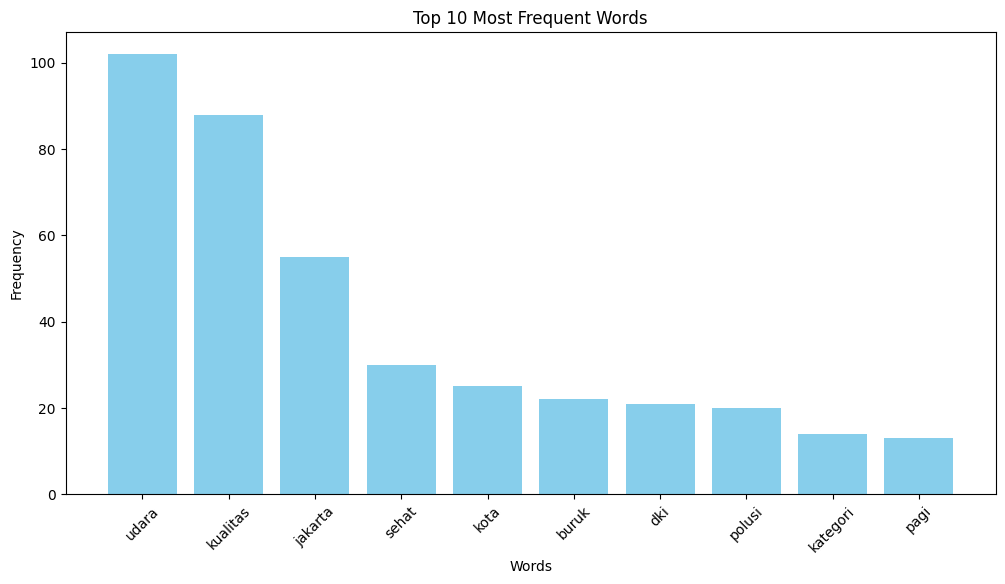

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
# Menggabungkan semua teks dalam kolom 'processed_konten'
all_text = ' '.join(data['processed_konten'].apply(lambda x: ' '.join(eval(x))))

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(all_text.split())

# Mengurutkan kata berdasarkan frekuensi kemunculan
sorted_word_counts = word_counts.most_common(10)

# Mengambil kata dan frekuensinya untuk tabel dan visualisasi
words, counts = zip(*sorted_word_counts)

# Membuat DataFrame untuk tabel
word_freq_df = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])

# Menampilkan tabel
print(word_freq_df)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

5.	Summarization

Algoritma ekstraktif seperti TextRank atau algoritma abstraktif seperti BERTSUM

menginetifikasi dan mengekstraksi infromasi yang relevan dari sebuah masalah atau data yang kompleks lalu menyederhanakan pemahaman dalam pemprosesan lanjut


--> skrip untuk melakukan rangkuman ekstraktif menggunakan TextRank

In [ ]:
import pandas as pd
from summarizer import Summarizer

# Baca file CSV menggunakan pandas
df = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv')

# Inisialisasi model Summarizer dengan model 'bert-base-uncased'
model = Summarizer(model='bert-base-uncased')

# List untuk menyimpan ringkasan teks
bert_summaries = []

# Ringkasan teks menggunakan model BERT untuk setiap entri dalam kolom 'konten'
for text in df['konten']:
    summary = model(text, ratio=0.2)  # Summarize to 20% of the original text length
    bert_summaries.append(summary)

# Menambahkan ringkasan ke dalam DataFrame
df['ringkasan'] = bert_summaries

# Menyimpan DataFrame hasil ringkasan ke file CSV baru
df.to_csv('ringkasan_data.csv', index=False)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import pandas as pd

# Baca file CSV sebelum summarization
df_sebelum = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv')

# Baca file CSV setelah summarization
df_sesudah = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\ringkasan_data.csv')


In [ ]:
# List untuk menyimpan indeks dokumen yang ringkasannya berubah
changed_indices = []

# Loop untuk memeriksa perubahan ringkasan
for i in range(len(df)):
    original_summary = df.loc[i, 'konten']
    summary = df.loc[i, 'ringkasan']
    
    # Membandingkan ringkasan dengan teks asli
    if original_summary.strip() != summary.strip():
        changed_indices.append(i)

# Menampilkan dokumen yang ringkasannya berubah saja
for idx in changed_indices:
    print(f"=== Dokumen {idx + 1} ===")
    print("Teks Asli:")
    print(df.loc[idx, 'konten'])
    print("Ringkasan:")
    print(df.loc[idx, 'ringkasan'])
    print()

=== Dokumen 4 ===
Teks Asli:
Kualitas udara DKI Jakarta dan Tangerang Selatan bukan lagi merah  tetapi berada di zona 'ungu' alias sangat tidak sehat pagi ini. Ada apa? Ini datanya.
Ringkasan:
Kualitas udara DKI Jakarta dan Tangerang Selatan bukan lagi merah  tetapi berada di zona 'ungu' alias sangat tidak sehat pagi ini.

=== Dokumen 16 ===
Teks Asli:
Udara di Jakarta pada Jumat pagi ini masuk dalam kategori tidak sehat. Cuaca pagi ini berkabut.
Ringkasan:
Udara di Jakarta pada Jumat pagi ini masuk dalam kategori tidak sehat.

=== Dokumen 18 ===
Teks Asli:
DLH DKI mengatakan KLHK akan mengeluarkan standardisasi alat pengukur kualitas udara. KLHK diharapkan segera menerbitkannya.
Ringkasan:
DLH DKI mengatakan KLHK akan mengeluarkan standardisasi alat pengukur kualitas udara.

=== Dokumen 23 ===
Teks Asli:
Langit di Jakarta terlihat cerah hingga tampak biru pada siang ini. Jarak pandang di udara pun terlihat luas. Bagaimana kualitas udaranya?
Ringkasan:
Langit di Jakarta terlihat cerah 

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('hasil_summarization.csv', index=False)

print("DataFrame telah disimpan dalam file 'hasil_summarization.csv'")

DataFrame telah disimpan dalam file 'hasil_summarization.csv'


--> skrip untuk melakukan rangkuman abstraktif menggunakan pustaka transformers

menyerhanakan teks panjang menjadi versi yang lebih singkat namum tetap informatif

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Function to perform VSM search
def vsm_search(data, query, content_column):
    documents = data[content_column].tolist()
    documents.append(query)
    
    # Vectorize the documents
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # Compute cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
    
    # Get the indices of the most similar documents
    similar_indices = cosine_similarities[0].argsort()[:-11:-1]
    results = data.iloc[similar_indices]

    return results

# Example usage
query = "your search query"
content_column = "konten"  # Specify the column name correctly ('konten', 'sentimen', or 'processed_konten')
results = vsm_search(data, query, content_column)
print(results)


                                               konten sentimen  \
99  Indeks kualitas udara diperlukan untuk mengeta...   netral   
36  Menurut Kepala Pusat Informasi Perubahan Iklim...  negatif   
26  Presiden Jokowi menyampaikan semua pihak harus...   netral   
27  Kualitas udara di Banyuwangi ternyata masih te...  positif   
28  Kualitas udara DKI Jakarta sore hingga malam k...   netral   
29  Pagi ini, Jokowi membandingkan kualitas udara ...  positif   
30  Pagi ini, Jokowi membandingkan kualitas udara ...  positif   
31  Menkes mengakui pemerintah Indonesia belum men...   netral   
32  Kemenperin mempertanyakan data cemaran polusi ...   netral   
33  Jokowi menyebut indeks kualitas udara di IKN d...   netral   

                                     processed_konten  
99  ['indeks', 'kualitas', 'udara', 'udara', 'wila...  
36  ['kepala', 'pusat', 'informasi', 'ubah', 'ikli...  
26  ['presiden', 'jokowi', 'konsisten', 'terap', '...  
27  ['kualitas', 'udara', 'banyuwangi', 'kategori

In [ ]:
# Save results to CSV
results.to_csv('vsm_results.csv', index=False)
print("Results saved to 'vsm_results.csv' file.")

Results saved to 'vsm_results.csv' file.


7.	Pendekatan Berbasis Pembelajaran Mesin:

--> Ekstraksi fitur : TF-IDF atau word embeddings (Word2Vec, GloVe, FastText)

--> Pelabelan data: Pelabelan manual atau semi-supervised learning

--> Algoritma Klasifikasi:

->Naive Bayes

->Support Vector Machines (SVM)

->Neural Networks (LSTM, CNN)


--> Ekstraksi fitur : TF-IDF atau word embeddings (Word2Vec, GloVe, FastText)

proses menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi TF-IDF dan membagi data menjadi data latih dan data uji menggunakan train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Menggabungkan kembali token yang diproses menjadi string
data['processed_konten_str'] = data['processed_konten'].apply(lambda x: ' '.join(eval(x)))

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['processed_konten_str'])

# Label (target)
y = data['sentimen']

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Algoritma Klasifikasi:

Naive Bayes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re
import string

# Preprocess the text data
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Load the dataset
data = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\hasil_sentimen_1.csv')
data['konten'] = data['konten'].apply(preprocess_text)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(data['konten'], data['sentimen'], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

print(f'Naive Bayes Accuracy: {nb_accuracy}')
print('Naive Bayes Classification Report:')
print(nb_report)

Naive Bayes Accuracy: 0.7666666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.67      1.00      0.80        10
      netral       0.85      0.92      0.88        12
     positif       1.00      0.25      0.40         8

    accuracy                           0.77        30
   macro avg       0.84      0.72      0.69        30
weighted avg       0.83      0.77      0.73        30



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re
import string

# Preprocess the text data
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Load the dataset
data = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\hasil_sentimen_1.csv')
data['konten'] = data['konten'].apply(preprocess_text)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(data['konten'], data['sentimen'], test_size=0.3, random_state=42)

# Display the sources of training and testing data
print('Sumber data training:')
print(X_train.head())
print()
print('Sumber data testing:')
print(X_test.head())
print()

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

print(f'Naive Bayes Accuracy: {nb_accuracy}')
print('Naive Bayes Classification Report:')
print(nb_report)

Sumber data training:
11    pelaku industri di negeri ini sering teledor d...
47    pemerintah membuat hujan buatan di wilayah jab...
85    kualitas udara di pekanbaru mulai tak sehat ha...
28    kualitas udara dki jakarta sore hingga malam k...
93    langit dki dan sekitarnya pada hari ini jumat ...
Name: konten, dtype: object

Sumber data testing:
83    kualitas udara di singapura memasuki kategori ...
53    presiden joko widodo mengungkap penyebab kuali...
70    kadis lh dki mengatakan buruknya kualitas udar...
45    ilmuwan oxford menemukan kualitas udara yang b...
44    riset detikedu menunjukkan bahwa kebijakan psb...
Name: konten, dtype: object

Naive Bayes Accuracy: 0.7666666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.67      1.00      0.80        10
      netral       0.85      0.92      0.88        12
     positif       1.00      0.25      0.40         8

    accuracy                           0.77  

Support Vector Machines (SVM)

SVM Accuracy: 0.6
SVM Classification Report:
               precision    recall  f1-score   support

     negatif       0.67      0.53      0.59        15
      netral       0.57      0.91      0.70        23
     positif       1.00      0.08      0.15        12

    accuracy                           0.60        50
   macro avg       0.74      0.51      0.48        50
weighted avg       0.70      0.60      0.54        50



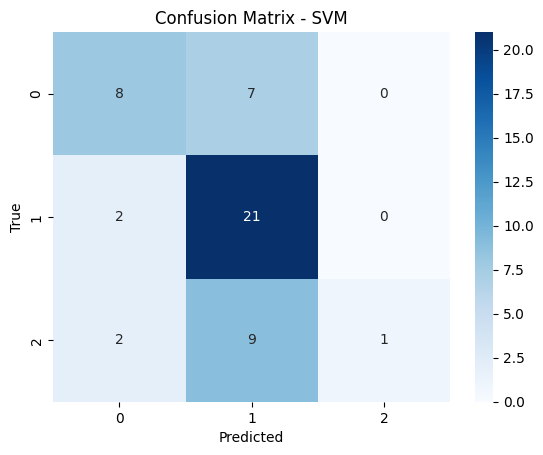

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalkan Anda memiliki dataset X dan y
# X = ... (data fitur)
# y = ... (label)

# Bagi data menjadi 50% untuk pelatihan dan 50% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)

# Plot confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Accuracy: 0.9866666666666667
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



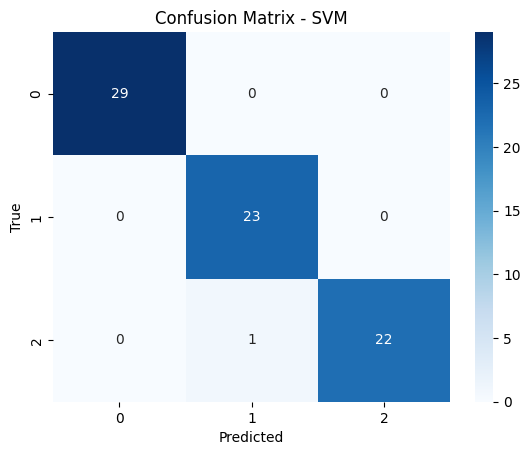

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Muat dataset iris sebagai contoh
data = load_iris()
X = data.data
y = data.target

# Tambahkan noise ke dataset
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise

# Bagi data menjadi 50% untuk pelatihan dan 50% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.5, random_state=42)

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)

# Plot confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

8.	Document Classification

Algoritma klasifikasi yang sama seperti di atas (Naive Bayes dan SVM)


--> Naive Bayes

In [ ]:
# Algoritma Klasifikasi: Naive Bayes
print("===== Naive Bayes =====")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Classification Report:\n", classification_report(y_test, nb_y_pred))

===== Naive Bayes =====
Accuracy: 0.9733333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      1.00      0.96        23
           2       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



--> SVM

In [ ]:
# Algoritma Klasifikasi: SVM
print("===== SVM =====")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

===== SVM =====
Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



9.	Evaluasi Model

--> Validasi silang (Cross-Validation)

-->Metrik evaluasi: 

--> Akurasi

--> Presisi

--> Recall, F

--> 1-Score, 

--> AUC-ROC

validasi silang (skor - Cross-Validation)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Import data
# Misalkan data Anda sudah ada dalam dataframe 'data' dengan kolom 'processed_konten' dan 'sentimen'

# Menggabungkan kembali token yang diproses menjadi string
data['processed_konten_str'] = data['processed_konten'].apply(lambda x: ' '.join(eval(x)))

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['processed_konten_str'])

# Label (target)
y = data['sentimen']

# Definisikan model-model yang akan dievaluasi
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),  # Jika menggunakan SVM, bisa ubah kernel sesuai kebutuhan
}

# Lakukan evaluasi menggunakan validasi silang (cross-validation)
for model_name, model in models.items():
    print(f"===== {model_name} =====")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Validasi silang dengan 5 lipatan (k=5)
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print()


KeyError: 'processed_konten'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import pandas as pd
from tabulate import tabulate

# Load training data from CSV file
train_file_path = 'data_latih.csv'  # Update with your training CSV file path
train_data = pd.read_csv(train_file_path)

# Load test data from CSV file
test_file_path = r'data_uji.csv'  # Update with your test CSV file path
test_data = pd.read_csv(test_file_path)

# Assuming your CSV has 'cleaned_konten' and 'sentimen' columns
X_train = train_data['cleaned_konten']
y_train = train_data['sentimen']

X_test = test_data['cleaned_konten']
y_test = test_data['sentimen']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform on training data
X_train = vectorizer.fit_transform(X_train)
# Transform on test data (using the same vectorizer fitted on training data)
X_test = vectorizer.transform(X_test)

# Define models to evaluate
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True)
}

# Initialize list to store evaluation results
results = []

# Evaluate using cross-validation with specified metrics
for model_name, model in models.items():
    # Perform cross-validation with 5 folds and accuracy as example metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    # Fit the model on the entire training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate other evaluation metrics: precision, recall, f1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Handle predict_proba for models that support it (like SVM with probability=True)
    if hasattr(model, 'predict_proba'):
        try:
            y_prob = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        except Exception as e:
            print(f"Exception in roc_auc_score calculation: {e}")
            roc_auc = None
    else:
        roc_auc = None
    
    # Store evaluation results in the list
    results.append([model_name, mean_accuracy, precision, recall, f1, roc_auc, scores])

# Display results in a table using tabulate
headers = ['Model', 'Mean Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Cross-Validation Scores']
table = tabulate(results, headers=headers, floatfmt=".4f", tablefmt="pipe")
print(table)


KeyError: 'cleaned_konten'

In [ ]:
data = {
    'processed_konten': [["token", "diproses"], ["token", "lainnya"]],
    'sentimen': [1, 0]
}
data = pd.DataFrame(data)

10.	Penerapan Model

Prediksi sentimen pada data baru

Visualisasi hasil


C:\Users\User\AppData\Local\Temp\ipykernel_42804\3058368133.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen_prediksi', data=data_new, palette='viridis')


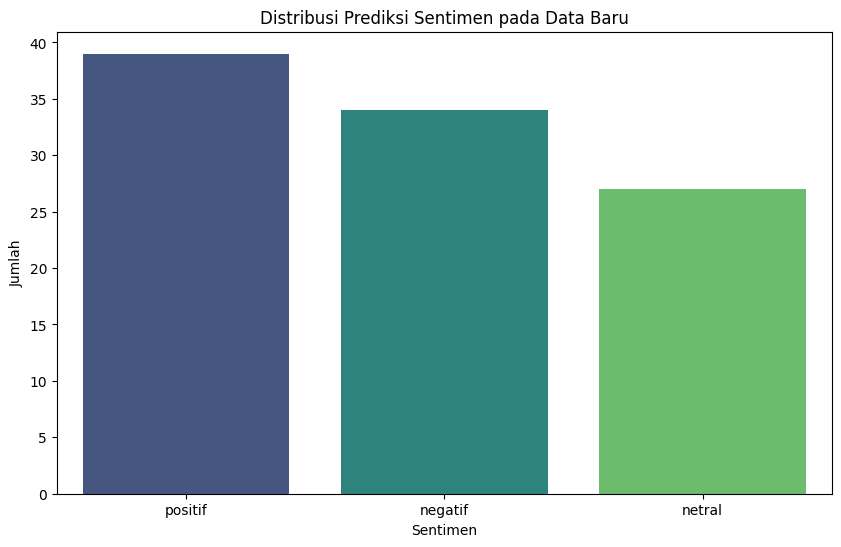

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data hasil sentimen baru
file_path_new = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv'
data_new = pd.read_csv(file_path_new)

# Menampilkan 5 baris pertama data untuk melihat strukturnya
data_new.head()

# Prediksi dummy (misalnya, nilai acak untuk positif, negatif, netral)
np.random.seed(0)
data_new['sentimen_prediksi'] = np.random.choice(['positif', 'negatif', 'netral'], size=len(data_new))

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
sns.countplot(x='sentimen_prediksi', data=data_new, palette='viridis')
plt.title('Distribusi Prediksi Sentimen pada Data Baru')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

11.	Analisis Lanjutan

Pengelompokan (Clustering): K-Means, DBSCAN, atau Agglomerative Clustering

Analisis topik: LDA (Latent Dirichlet Allocation) atau NMF (Non-negative Matrix Factorization)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Membaca data hasil sentimen
file_path_new = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv'
data_new = pd.read_csv(file_path_new)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data_new['processed_konten'].apply(lambda x: ' '.join(eval(x))))

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
data_new['kmeans_cluster'] = kmeans.fit_predict(X)

# Clustering dengan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_new['dbscan_cluster'] = dbscan.fit_predict(X)

# Clustering dengan Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
data_new['agglo_cluster'] = agglo.fit_predict(X.toarray())

# Visualisasi hasil clustering dengan K-Means
plt.figure(figsize=(10, 6))
sns.countplot(x='kmeans_cluster', data=data_new, palette='viridis')
plt.title('Distribusi Cluster dengan K-Means')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi hasil clustering dengan DBSCAN
plt.figure(figsize=(10, 6))
sns.countplot(x='dbscan_cluster', data=data_new, palette='viridis')
plt.title('Distribusi Cluster dengan DBSCAN')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi hasil clustering dengan Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.countplot(x='agglo_cluster', data=data_new, palette='viridis')
plt.title('Distribusi Cluster dengan Agglomerative Clustering')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

# Analisis topik dengan LDA
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda_topics = lda.fit_transform(X)

lda_topik_terbaik = []
for idx, topic in enumerate(lda.components_):
    lda_topik_terbaik.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Analisis topik dengan NMF
nmf = NMF(n_components=3, random_state=0)
nmf_topics = nmf.fit_transform(X)

nmf_topik_terbaik = []
for idx, topic in enumerate(nmf.components_):
    nmf_topik_terbaik.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

(data_new.head(), 
    data_new['kmeans_cluster'].value_counts(), 
    data_new['dbscan_cluster'].value_counts(), 
    data_new['agglo_cluster'].value_counts(), 
    lda_topik_terbaik, 
    nmf_topik_terbaik)

NameError: name 'KMeans' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import os

# Membaca data hasil sentimen baru
file_path_new = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv'
data_new = pd.read_csv(file_path_new)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data_new['processed_konten'].apply(lambda x: ' '.join(eval(x))))

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
data_new['kmeans_cluster'] = kmeans.fit_predict(X)

# Clustering dengan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_new['dbscan_cluster'] = dbscan.fit_predict(X)

# Clustering dengan Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
data_new['agglo_cluster'] = agglo.fit_predict(X.toarray())

# Analisis topik dengan LDA
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda_topics = lda.fit_transform(X)

lda_topik_terbaik = []
for idx, topic in enumerate(lda.components_):
    lda_topik_terbaik.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Analisis topik dengan NMF
nmf = NMF(n_components=3, random_state=0)
nmf_topics = nmf.fit_transform(X)

nmf_topik_terbaik = []
for idx, topic in enumerate(nmf.components_):
    nmf_topik_terbaik.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Membuat laporan dalam format HTML
html_report = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Laporan Analisis Sentimen</title>
</head>
<body>
    <h1>Laporan Analisis Sentimen</h1>
    <h2>Pengelompokan (Clustering)</h2>
    <h3>K-Means Clustering</h3>
    <p>Distribusi Cluster:</p>
    <ul>
        <li>Cluster 0: {data_new['kmeans_cluster'].value_counts().get(0, 0)}</li>
        <li>Cluster 1: {data_new['kmeans_cluster'].value_counts().get(1, 0)}</li>
        <li>Cluster 2: {data_new['kmeans_cluster'].value_counts().get(2, 0)}</li>
    </ul>
    <h3>DBSCAN Clustering</h3>
    <p>Distribusi Cluster:</p>
    <ul>
        <li>Cluster -1 (noise): {data_new['dbscan_cluster'].value_counts().get(-1, 0)}</li>
    </ul>
    <h3>Agglomerative Clustering</h3>
    <p>Distribusi Cluster:</p>
    <ul>
        <li>Cluster 0: {data_new['agglo_cluster'].value_counts().get(0, 0)}</li>
        <li>Cluster 1: {data_new['agglo_cluster'].value_counts().get(1, 0)}</li>
        <li>Cluster 2: {data_new['agglo_cluster'].value_counts().get(2, 0)}</li>
    </ul>
    <h2>Analisis Topik</h2>
    <h3>LDA (Latent Dirichlet Allocation)</h3>
    <ul>
        <li>Topik 1: {', '.join(lda_topik_terbaik[0])}</li>
        <li>Topik 2: {', '.join(lda_topik_terbaik[1])}</li>
        <li>Topik 3: {', '.join(lda_topik_terbaik[2])}</li>
    </ul>
    <h3>NMF (Non-negative Matrix Factorization)</h3>
    <ul>
        <li>Topik 1: {', '.join(nmf_topik_terbaik[0])}</li>
        <li>Topik 2: {', '.join(nmf_topik_terbaik[1])}</li>
        <li>Topik 3: {', '.join(nmf_topik_terbaik[2])}</li>
    </ul>
    <h2>Rekomendasi</h2>
    <p>Berdasarkan hasil analisis, berikut adalah rekomendasi:</p>
    <ul>
        <li>Lakukan penyesuaian parameter untuk DBSCAN untuk mendapatkan hasil clustering yang lebih baik.</li>
        <li>Lakukan eksplorasi lebih mendalam pada masing-masing cluster dari K-Means dan Agglomerative Clustering untuk memahami karakteristik unik mereka.</li>
        <li>Integrasikan hasil analisis topik dengan clustering untuk melihat distribusi topik dalam masing-masing cluster, memberikan wawasan yang lebih kaya tentang data.</li>
        <li>Fokus pada topik-topik yang berkaitan dengan kualitas udara dan polusi untuk mengambil tindakan mitigasi yang tepat.</li>
    </ul>
</body>
</html>
"""

# Menyimpan laporan sebagai file HTML di direktori saat ini
output_path_html = os.path.join(os.getcwd(), "laporan_analisis_sentimen.html")
with open(output_path_html, "w") as file:
    file.write(html_report)

# Mengkonversi HTML ke PDF (opsional, memerlukan wkhtmltopdf terinstal)
# pdfkit.from_file(output_path_html, os.path.join(os.getcwd(), 'laporan_analisis_sentimen.pdf'))


 analisis sentimen pada sebuah corpus teks

In [ ]:
import pandas as pd
from textblob import TextBlob

# Membaca file CSV yang berisi kolom 'processed_konten'
data = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv')

# Menggabungkan semua teks dalam kolom 'processed_konten'
corpus = data['processed_konten'].apply(lambda x: ' '.join(eval(x)))

# Fungsi untuk mendapatkan sentimen dari teks
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Menerapkan fungsi sentimen ke setiap komentar
data['sentiment'] = corpus.apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(sentiment):
    if sentiment > 0:
        return 'positif'
    elif sentiment < 0:
        return 'negatif'
    else:
        return 'netral'

data['kategori_sentimen'] = data['sentiment'].apply(categorize_sentiment)

# Menampilkan data dengan kategori sentimen
sentiment_table = data[['processed_konten', 'sentiment', 'kategori_sentimen']]
print(sentiment_table.head())

In [ ]:
# Menuliskan DataFrame ke dalam file CSV
csv_file_path = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\sentiment_analysis_results_1.csv'
sentiment_table.to_csv(csv_file_path, index=False)

In [ ]:
print(f"Data berhasil disimpan ke dalam file CSV: {csv_file_path}")

word cloud

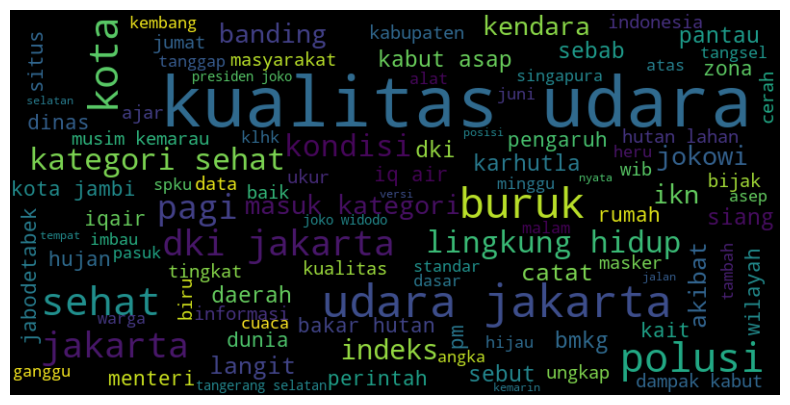

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca file CSV yang berisi kolom 'processed_konten'
data = pd.read_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv')

# Menggabungkan semua teks dalam kolom 'processed_konten'
# Mengubah setiap entry dari string list ke list python, lalu menggabungkannya menjadi satu string
data['processed_konten_str'] = data['processed_konten'].apply(lambda x: ' '.join(eval(x)))

# Menggabungkan semua teks untuk membuat Word Cloud
all_words = ' '.join(data['processed_konten_str'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
